In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd

In [2]:
df = pd.read_csv('lr_ex.csv')

In [3]:
df

,X,Y
0,1,3.888889
1,2,4.555556
2,3,5.222222
3,4,5.888889
4,5,6.555556
...,...,...
295,296,200.555556
296,297,201.222222
297,298,201.888889
298,299,1.888889


In [4]:
X = df['X'].to_numpy().reshape(-1,1)
y = df['Y'].to_numpy().reshape(-1,1)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.33)
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

R2 score =  0.7864010459704774
MSE =  816.1840629623827


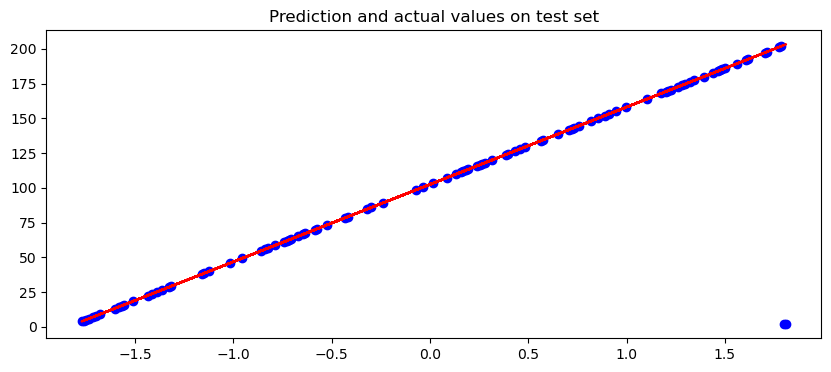

In [5]:
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
mdl = LinearRegression()
mdl.fit(x_train,y_train)
y_pred = mdl.predict(x_test)
r2 = sk.metrics.r2_score(y_test,y_pred)
mse_test = sk.metrics.mean_squared_error(y_test,y_pred)
print("R2 score = ",r2)
print('MSE = ',mse_test)

plt.figure(figsize=(10,4))
plt.title('Prediction and actual values on test set')
plt.scatter(x_test,y_test,c='blue')
plt.plot(x_test,y_pred,c='red')
plt.show()

In [6]:
mdl.score(x_test,y_test) #accuracy score

0.7864010459704774

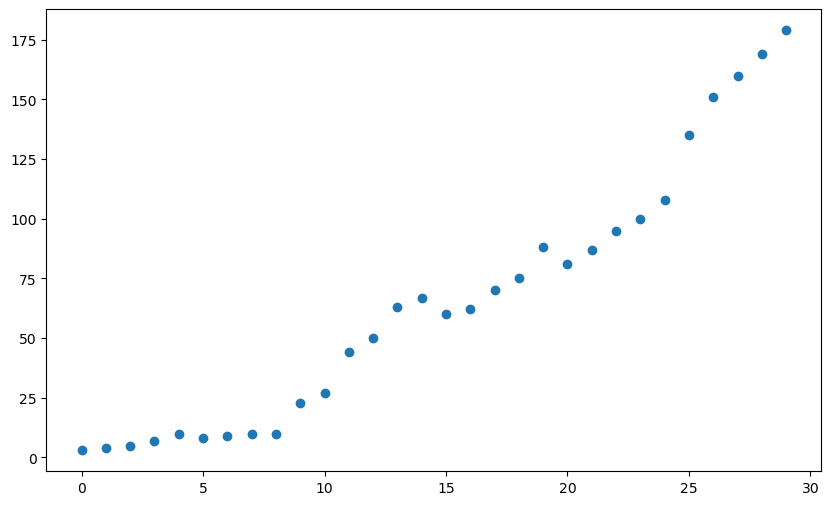

In [7]:
import numpy as np
x = np.arange(0,30)
y = [3,4,5,7,10,8,9,10,10,23,27,44,50,63,67,60,62,70,75,88,81,87,95,100,108,135,151,160,169,179]
plt.figure(figsize=(10,6))
plt.scatter(x,y)
plt.show()


In [8]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)

In [9]:
poly_features = poly.fit_transform(x.reshape(-1,1))

In [10]:
mdl.fit(poly_features,y)

LinearRegression()

In [11]:
y_predicted = mdl.predict(poly_features)

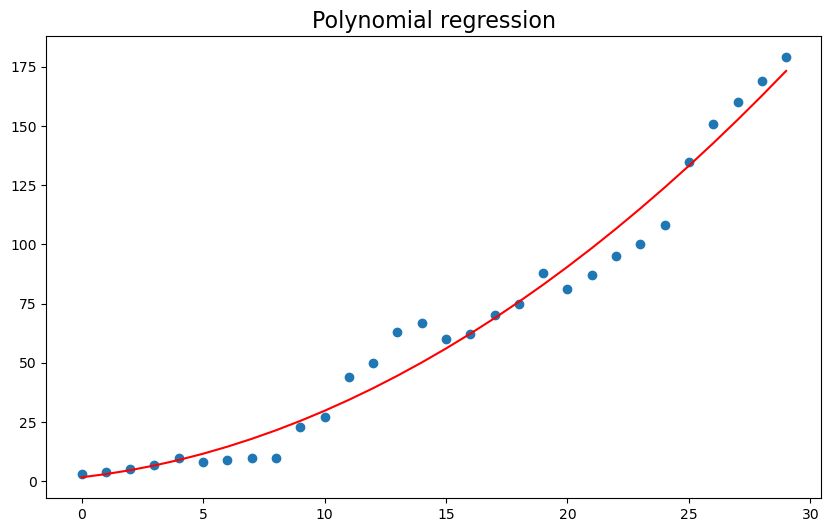

In [12]:
plt.figure(figsize=(10,6))
plt.title("Polynomial regression", size = 16)
plt.scatter(x,y)
plt.plot(x,y_predicted,c='red')
plt.show()

In [13]:
#Homework --> Stepwise Regression

Lasso Regression

In [14]:
from sklearn.linear_model import Lasso,LassoCV

lasso_cv = LassoCV(alphas = None, cv = 10, max_iter = 100000) #formula for lasso (1/(2*n_sampl))
lasso_cv.fit(x_train,y_train)

E:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LassoCV(cv=10, max_iter=100000)

In [16]:
alpha = lasso_cv.alpha_
alpha

0.05563122077258805

In [17]:
lasso = Lasso(alpha = lasso_cv.alpha_)
lasso.fit(x_train,y_train)

Lasso(alpha=0.05563122077258805)

In [18]:
lasso.predict(x_test)

array([167.8234627 ,  61.26346269, 123.86746269, 133.8574627 ,
        54.60346269, 119.87146269,  28.62946269, 107.21746269,
        23.96746269,  38.61946269, 100.55746269, 103.22146269,
        79.24546269,  14.64346269, 151.8394627 , 157.8334627 ,
       134.5234627 , 111.87946269,  66.59146269, 141.8494627 ,
         9.31546269, 174.4834627 , 201.7894627 , 189.1354627 ,
       117.20746269, 169.8214627 ,  45.94546269, 203.1214627 ,
        55.93546269, 197.7934627 , 142.5154627 , 115.87546269,
        39.95146269,  58.59946269,  63.26146269, 143.1814627 ,
       202.4554627 , 172.4854627 , 129.19546269,  70.58746269,
       111.21346269,   5.31946268, 149.8414627 , 185.8054627 ,
        84.57346269,   3.98746268,  67.25746269, 147.8434627 ,
        73.25146269, 155.1694627 , 179.8114627 , 109.88146269,
        69.92146269, 127.86346269, 173.8174627 ,  13.31146269,
       184.4734627 ,   4.65346268,  62.59546269, 201.1234627 ,
       169.1554627 ,  49.27546269,  37.95346269, 126.53

In [19]:
lasso.score(x_train,y_train)


0.999999

In [20]:
mse = np.mean((y_pred - y_test)**2)
mse

816.1840629623827

In [21]:
lasso.score(x_test,y_test)

0.7866134886750514

Lasso removes some features altogether, Ridge penalizes some terms near to zero but not zero.

In [23]:
from sklearn.linear_model import Ridge, RidgeCV

alphas = np.random.uniform(0,10,50)
ridge_cv = RidgeCV(alphas = alphas, cv=10)
ridge_cv.fit(x_train,y_train)

RidgeCV(alphas=array([8.75514654, 2.18860281, 3.02807152, 3.54195834, 0.12461403,
       2.72947129, 0.57798033, 2.7879332 , 6.12075913, 4.36088346,
       9.11650169, 7.61173229, 3.53938757, 5.6318015 , 1.43450227,
       2.72963373, 2.99450081, 7.74051374, 8.01150395, 5.18371817,
       6.48548384, 5.37561616, 7.83019603, 8.42408208, 5.04397194,
       4.87409975, 2.42117038, 5.30333408, 5.3546963 , 5.9708127 ,
       2.91779245, 2.04735052, 5.04452899, 0.17779896, 0.254487  ,
       0.29648252, 1.1470367 , 2.59272768, 5.67560097, 2.3153868 ,
       5.80534862, 4.71689523, 5.91205862, 6.14802684, 9.21017746,
       5.85147917, 8.3046454 , 9.8458029 , 1.59520368, 9.50125241]),
        cv=10)

In [26]:
alpha = ridge_cv.a_
alpha

0.12461402615120298

In [27]:
ridge = Ridge(alpha = lasso_cv.alpha_)
ridge.fit(x_train,y_train)

Ridge(alpha=0.05563122077258805)

In [28]:
ridge.score(x_train,y_train)

0.9999999234395112

In [31]:
ridge.score(x_test,y_test)


0.7864600280783112

# Logistic Regression

In [3]:
titanic = pd.read_csv('Titanic-Dataset.csv')

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
from sklearn.linear_model import LogisticRegression

In [6]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder() #Initializing an object of class LabelEncoder
titanic['Sex'] = labelencoder.fit_transform(titanic['Sex'])


In [7]:
del titanic['Name']
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,1,35.0,0,0,373450,8.0500,NaN,S


In [8]:
del titanic['Ticket']
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,1,22.0,1,0,7.2500,NaN,S
1,2,1,1,0,38.0,1,0,71.2833,C85,C
2,3,1,3,0,26.0,0,0,7.9250,NaN,S
3,4,1,1,0,35.0,1,0,53.1000,C123,S
4,5,0,3,1,35.0,0,0,8.0500,NaN,S


In [9]:
del titanic['Cabin']
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,S
1,2,1,1,0,38.0,1,0,71.2833,C
2,3,1,3,0,26.0,0,0,7.9250,S
3,4,1,1,0,35.0,1,0,53.1000,S
4,5,0,3,1,35.0,0,0,8.0500,S


In [10]:
del titanic['Embarked']
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,1,22.0,1,0,7.2500
1,2,1,1,0,38.0,1,0,71.2833
2,3,1,3,0,26.0,0,0,7.9250
3,4,1,1,0,35.0,1,0,53.1000
4,5,0,3,1,35.0,0,0,8.0500


In [11]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
dtype: int64

In [12]:
meanS = titanic[titanic.Survived == 1].Age.mean()
meanN = titanic[titanic.Survived == 0].Age.mean()

In [15]:
import numpy as np
titanic['Age'] = np.where(pd.isnull(titanic.Age) & titanic['Survived'] == 1 , meanS , titanic['Age'])
titanic.head(17)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,1,22.000000,1,0,7.2500
1,2,1,1,0,38.000000,1,0,71.2833
2,3,1,3,0,26.000000,0,0,7.9250
3,4,1,1,0,35.000000,1,0,53.1000
4,5,0,3,1,35.000000,0,0,8.0500
5,6,0,3,1,30.626179,0,0,8.4583
6,7,0,1,1,54.000000,0,0,51.8625
7,8,0,3,1,2.000000,3,1,21.0750
8,9,1,3,0,27.000000,0,2,11.1333
9,10,1,2,0,14.000000,1,0,30.0708


In [16]:
titanic.Age.fillna(meanN,inplace=True)
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,1,22.0,1,0,7.2500
1,2,1,1,0,38.0,1,0,71.2833
2,3,1,3,0,26.0,0,0,7.9250
3,4,1,1,0,35.0,1,0,53.1000
4,5,0,3,1,35.0,0,0,8.0500


In [17]:
titanic.dropna(inplace=True)
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,1,22.0,1,0,7.2500
1,2,1,1,0,38.0,1,0,71.2833
2,3,1,3,0,26.0,0,0,7.9250
3,4,1,1,0,35.0,1,0,53.1000
4,5,0,3,1,35.0,0,0,8.0500


In [18]:
x = titanic.drop('Survived',axis=1)
y= titanic['Survived']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state = 101)

In [19]:
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)
predictions = logmodel.predict(x_test)

E:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.77      0.86      0.81       154
           1       0.77      0.65      0.70       114

    accuracy                           0.77       268
   macro avg       0.77      0.75      0.76       268
weighted avg       0.77      0.77      0.77       268



In [22]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[132,  22],
       [ 40,  74]], dtype=int64)

[TP FP],
[FN TN] 

# Support Vector Machine

In [26]:
from sklearn.svm import SVC

In [29]:
svc = SVC()
svc.fit(x_train,y_train)
Y_pred = svc.predict(x_test)
train_acc_svc = round(svc.score(x_train,y_train)*100,2)
acc_svc = round(svc.score(x_test,y_test)*100,2)
print(train_acc_svc,acc_svc)

65.81 60.45


# K Nearest Neighbors Algorithm

In [31]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
acc_knn = round(knn.score(x_test,y_test)*100,2)
acc_knn

56.34

# Decision Trees


In [34]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train,y_train)
Y_pred = decision_tree.predict(x_test)
acc_decision_tree = round(decision_tree.score(x_test,y_test)*100,2)
acc_decision_tree

73.51

In [35]:
#HW SG post